In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pyodbc
import FinanceLib as fl
style.use('ggplot')


%matplotlib inline
%load_ext autoreload
%autoreload 2

C:\Users\PETR\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [106]:
fname  = 'C:/Users/40KravchukPV.REGION/Documents/Courses/FinanceProject/config.txt'
config_dict = fl.ReadConnConfig(fname)
con = pyodbc.connect(driver = config_dict['DRIVER'],server = config_dict['SERVER'], port = config_dict['PORT'], database = config_dict['DATABASE'], UID = config_dict['UID'], PWD = config_dict['PWD'], autocommit=True)

In [2]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8429 sha256=0f236eaeca6854f8aac33a17912f6f851654badebacef42f2fd1bad70835f072
  Stored in directory: C:\Users\40KRAV~1.REG\AppData\Local\Temp\pip-ephem-wheel-cache-xlw5ahi4\wheels\eb\17\99\0f3929e635912eb25fc346aaf43b4ee3da4a80dee8ce3d2e4f
Successfully built mpl-finance
Note: you may need to restart the kernel to use updated packages.


In [163]:
df = fl.GetStockQuoteFromDB(con, 'ES, AAPL', IsDtIndex = 1, IsStockIndex = 0, DateFrom = 'NULL', DateTo = 'NULL')

In [164]:
df.head()

,Stock,OpenValue,HighValue,LowValue,CloseValue,AdjClose,Volume,LoadDt
Dt,,,,,,,,
2015-12-31,AAPL,26.752501,26.757500,26.205000,26.315001,24.380093,163649200.0,2021-01-28 19:49:35.147
2015-12-31,ES,51.889999,51.900002,50.549999,51.070000,43.896469,2081200.0,2021-01-28 20:53:03.533
2016-01-04,AAPL,25.652500,26.342501,25.500000,26.337500,24.400942,270597600.0,2021-01-28 19:49:35.160
2016-01-04,ES,50.650002,50.889999,50.230000,50.880001,43.733162,1590300.0,2021-01-28 20:53:03.550
2016-01-05,AAPL,26.437500,26.462500,25.602501,25.677500,23.789471,223164000.0,2021-01-28 19:49:35.177


In [51]:
df.index

DatetimeIndex(['2015-12-31', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2021-01-14', '2021-01-15', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-25', '2021-01-26',
               '2021-01-27', '2021-01-28'],
              dtype='datetime64[ns]', name='Dt', length=1278, freq=None)

In [52]:
df.head()

,Stock,OpenValue,HighValue,LowValue,CloseValue,AdjClose,Volume,LoadDt
Dt,,,,,,,,
2015-12-31,ES,51.889999,51.900002,50.549999,51.070000,43.896469,2081200.0,2021-01-28 20:53:03.533
2016-01-04,ES,50.650002,50.889999,50.230000,50.880001,43.733162,1590300.0,2021-01-28 20:53:03.550
2016-01-05,ES,50.849998,51.430000,50.009998,51.349998,44.137138,1087100.0,2021-01-28 20:53:03.563
2016-01-06,ES,51.040001,51.650002,50.730000,51.459999,44.231693,1265500.0,2021-01-28 20:53:03.577
2016-01-07,ES,50.799999,51.290001,50.759998,51.139999,43.956642,2141700.0,2021-01-28 20:53:03.590


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


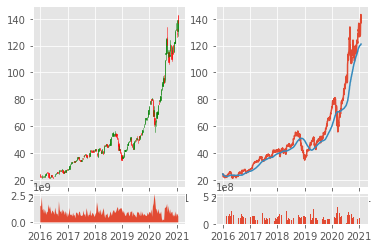

<Figure size 1200x800 with 0 Axes>

In [177]:
df_input = fl.GetStockQuoteFromDB(con, 'AAPL', IsDtIndex = 1, IsStockIndex = 0, DateFrom = 'NULL', DateTo = 'NULL')
df = df_input[df_input['Stock'] == 'AAPL']
df_ohlc = df['AdjClose'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Dt'] = df_ohlc['Dt'].map(mdates.date2num)
df['100ma'] = df['AdjClose'].rolling(window=100,min_periods=0).mean()

ax1 = plt.subplot2grid((6,2), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,2), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax3 = plt.subplot2grid((6,2), (0,1), rowspan=5, colspan=1)
ax4 = plt.subplot2grid((6,2), (5,1), rowspan=1, colspan=1, sharex=ax3)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

ax3.plot(df.index, df['AdjClose'])
ax3.plot(df.index, df['100ma'])
ax4.bar(df.index, df['Volume'])

fig=plt.figure(figsize=(12,8), dpi= 100)

plt.show()

In [84]:
def GetCandlePlot(df_input, Stock, ReSample = '10D'):
    
    df = df_input[df_input['Stock'] == Stock]
    df_ohlc = df['AdjClose'].resample(ReSample).ohlc()
    df_volume = df['Volume'].resample(ReSample).sum()
    df_ohlc.reset_index(inplace=True)
    df_ohlc['Dt'] = df_ohlc['Dt'].map(mdates.date2num)

    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
    ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
    ax3 = plt.subplot2grid((6,1), (0,1), rowspan=5, colspan=1)
    ax1.xaxis_date()

    candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')
    ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
    plt.show()

In [201]:
def GetMAPlot(df_input, Stock, WindowValue=100, MinPerValue = 0):
    
    df = df_input[df_input['Stock'] == Stock]
    df['ma'] = df['AdjClose'].rolling(window=WindowValue,min_periods=MinPerValue).mean()

    fig = plt.figure(figsize=(12, 7))
    
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
    ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
    ax1.xaxis_date()
    
    ax1.plot(df.index, df['AdjClose'])
    ax1.plot(df.index, df['ma'])
    ax2.bar(df.index, df['Volume'])
    
    plt.show()

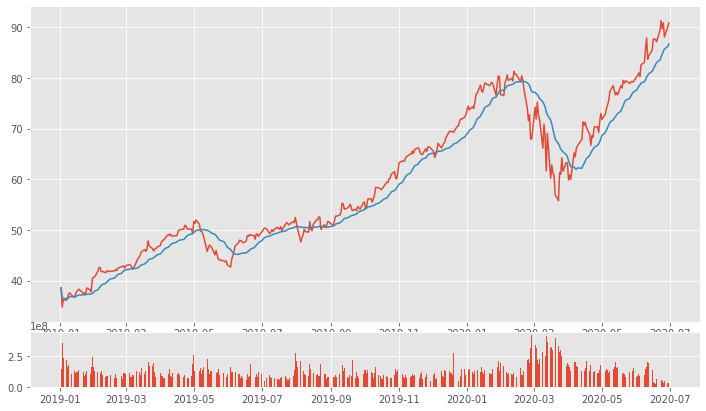

In [203]:
fl.GetMAPlot(df['2019-01':'2020-06'], 'AAPL', 20)

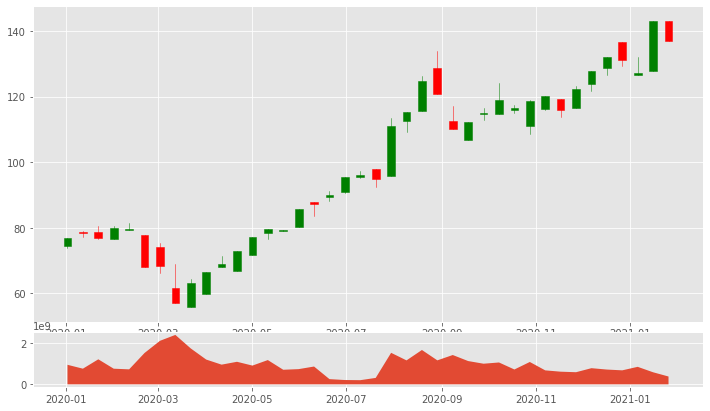

In [205]:
fl.GetCandlePlot(df['2020-01':'2021-06'], 'AAPL', ReSample = '10D')